In [21]:
# Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import stumpy
from matplotlib.patches import Rectangle
from statsmodels.tsa.seasonal import seasonal_decompose
from IPython.display import Image
from scipy.stats import boxcox
from pmdarima import auto_arima
from datetime import datetime, timedelta
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from sklearn.metrics import silhouette_score 
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler
from tslearn.metrics import cdist_dtw
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

<div style="background-color:rgb(255, 132, 91); padding: 15px; border-radius: 5px; border: 1px solid #dcdcdc;">

# 5-A: Data Preparation and Exploration

</div>

<div style="background-color: #33a2ff; padding: 15px; border-radius: 5px; border: 1px solid #dcdcdc;">

1. **Clean the dataset**:
   - Clean the dataset.
   - Address missing values. 
   - Change the data types to make the data useable 

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,XOM,5/27/2011,$80.22,$82.63,$80.07,$82.63,68230855,3.00424,-21.355713,86758820.0,$83.28,$81.18,-2.521610,75,0.568801
746,2,XOM,6/3/2011,$83.28,$83.75,$80.18,$81.18,78616295,-2.52161,15.221032,68230855.0,$80.93,$79.78,-1.420980,68,0.578960
747,2,XOM,6/10/2011,$80.93,$81.87,$79.72,$79.78,92380844,-1.42098,17.508519,78616295.0,$80.00,$79.02,-1.225000,61,0.589120
748,2,XOM,6/17/2011,$80.00,$80.82,$78.33,$79.02,100521400,-1.22500,8.811952,92380844.0,$78.65,$76.78,-2.377620,54,0.594786


There are 30 unique stocks as there should be
number of NaN rows: 30


C:\Users\victo\AppData\Local\Temp\ipykernel_36744\128893498.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dow_jones.fillna(method="bfill", inplace=True)


,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,15.82,16.72,15.78,16.42,239655616,3.79267,1.380223,239655616.0,16.71,15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,XOM,5/27/2011,80.22,82.63,80.07,82.63,68230855,3.00424,-21.355713,86758820.0,83.28,81.18,-2.521610,75,0.568801
746,2,XOM,6/3/2011,83.28,83.75,80.18,81.18,78616295,-2.52161,15.221032,68230855.0,80.93,79.78,-1.420980,68,0.578960
747,2,XOM,6/10/2011,80.93,81.87,79.72,79.78,92380844,-1.42098,17.508519,78616295.0,80.00,79.02,-1.225000,61,0.589120
748,2,XOM,6/17/2011,80.00,80.82,78.33,79.02,100521400,-1.22500,8.811952,92380844.0,78.65,76.78,-2.377620,54,0.594786


,close
date,
2011-01-07,0.001000
2011-01-14,0.099948
2011-01-21,0.174192
2011-01-28,0.131843
2011-02-04,0.367892
2011-02-11,0.527367
2011-02-18,0.630909
2011-02-25,0.401985
2011-03-04,0.435811


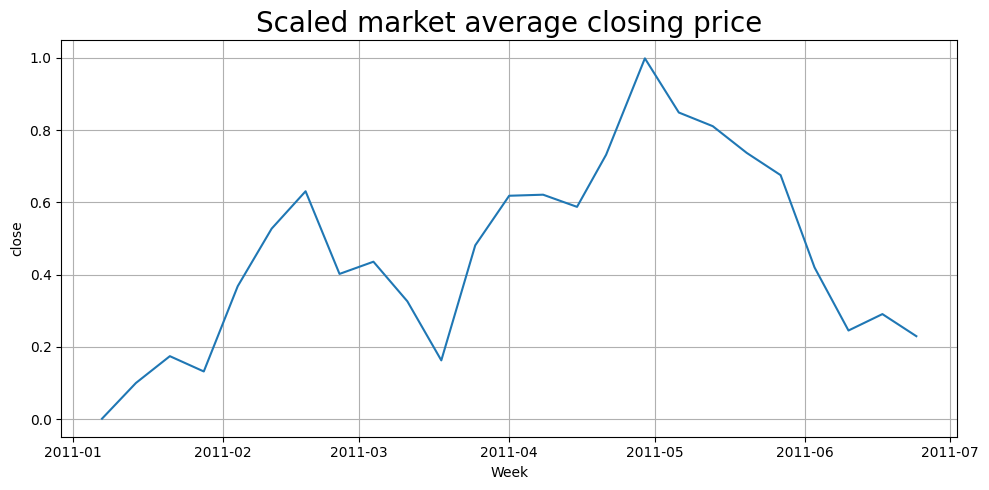

In [22]:
# Importing and displaying the initial rows in the dataset
dow_jones = pd.read_csv('dow_jones_index.data')
display(dow_jones)

# We need to remove the dollar signs and change the datatype to float in some of the numerical columns 
columns_to_change = ["open", "high", "low", "close", "next_weeks_open", "next_weeks_close"]
for column in columns_to_change:
    dow_jones[column] = dow_jones[column].replace({"\\$": ""}, regex=True).astype(float)

# Printing unique values in the stock column to confirm that it contains 30 unique stocks as dow jones should
print(f'There are {len(dow_jones["stock"].unique())} unique stocks as there should be')

# There are some NaN values at a few rows. Since we can not remova any rows which would create gaps in the timeseries, we are going to impute them with backfill.
# Columns backfilled are "percent_change_volume_over_last_wk" and "previous_weeks_volume" for the first week of every stock.
na_indices = dow_jones[dow_jones.isna().any(axis=1)].index
na_rows = dow_jones.iloc[na_indices]
print(f'number of NaN rows: {len(na_rows)}')
dow_jones.fillna(method="bfill", inplace=True)

# Since we are going to be working with the 'close' feature in the supervised part, we want to craete a separate and scaled dataframe containing just the 'close' column with 'date' as its index.
# To represent the market average, we are also going to aggregate the 'close' column. Lastly, we also want to change the 'date' column datatype into datetime objects.
scaler = MinMaxScaler(feature_range=(0.001, 0.999))     # we need to set the range here so that it will be compatible with libraries used later.
close_df = dow_jones[['date', 'close']]
close_df = close_df.groupby(by=['date']).mean()
scaled_data = scaler.fit_transform(np.array(close_df['close']).reshape(-1, 1))
close_df = close_df.assign(close=scaled_data)
close_df = close_df.reset_index()
close_df = close_df.assign(date = [datetime.strptime(date_str, '%m/%d/%Y').date() for date_str in close_df['date']])
close_df = close_df.set_index(close_df['date'])
close_df = close_df.drop(columns=['date'])
close_df = close_df.sort_index()

# displaying the cleaned dataframe again
display(dow_jones)
display(close_df)

# Plotting the timeseries we are going to be forecasting and predicting later
fig, ax = plt.subplots(1,1, figsize = (10, 5))
sns.lineplot(data=close_df, x='date', y='close', ax=ax)
ax.set_title('Scaled market average closing price', fontsize=20)
ax.set_xlabel('Week')
ax.grid()
plt.tight_layout()
plt.show()

<div style="background-color: #33a2ff; padding: 15px; border-radius: 5px; border: 1px solid #dcdcdc;">

2. **Summarize the dataset using  descriptive statistics.**

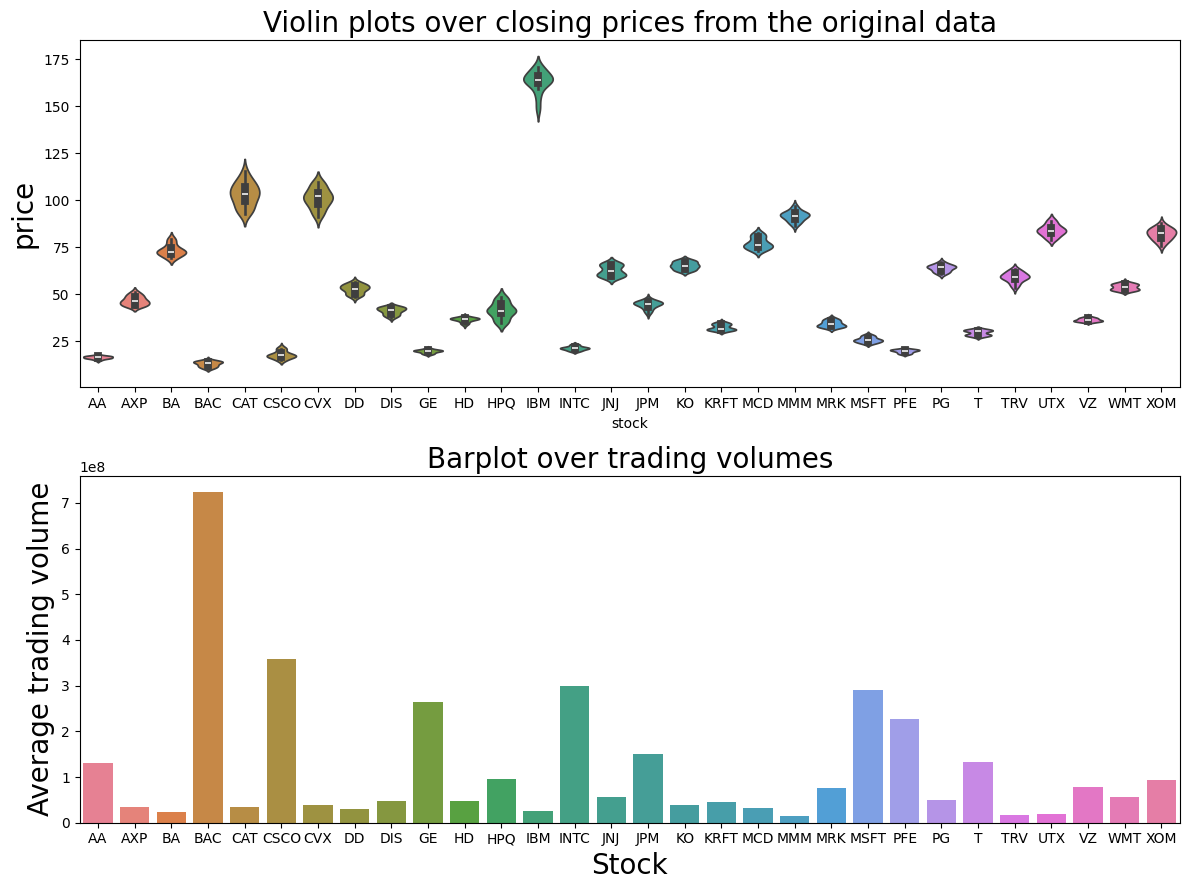

In [23]:
# Violin plots of the closing prices in the original dataframe (not scaled)

# Processing closing prices for plotting
all_stocks = dow_jones[['stock', 'close']]
all_stocks = pd.DataFrame(all_stocks)
all_stocks["group"] = all_stocks.groupby("stock").cumcount()
pivoted_df = all_stocks.pivot(index="group", columns="stock", values="close")
pivoted_df.reset_index(drop=True, inplace=True)

# Processing trading volume data for plotting
volumes = dow_jones[['stock', 'volume']]
volumes = pd.DataFrame(volumes)
volumes = volumes.groupby("stock").mean()
volumes=volumes.T

# Performing the plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 9))

sns.violinplot(data = pivoted_df, ax=ax1)
ax1.set_title('Violin plots over closing prices from the original data', fontsize=20)
ax1.set_ylabel('price', fontsize =20)

sns.barplot(data=volumes, ax=ax2)
ax2.set_title('Barplot over trading volumes', fontsize=20)
ax2.set_ylabel('Average trading volume', fontsize =20)
ax2.set_xlabel('Stock', fontsize =20)

plt.tight_layout()
plt.show()

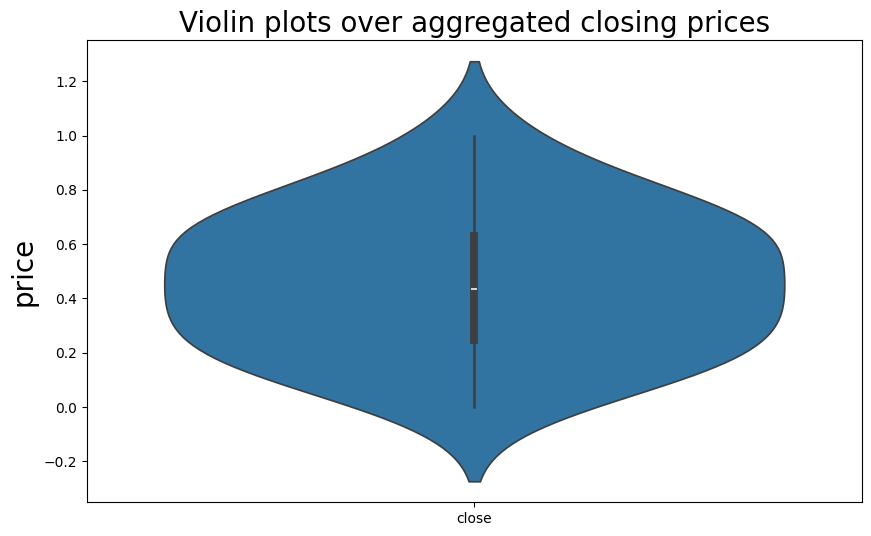

,close
count,25.000000
mean,0.462299
std,0.261570
min,0.001000
25%,0.245240
50%,0.435811
75%,0.630909
max,0.999000


In [24]:
# Violin plot of the close_df dataframe

fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))
sns.violinplot(data = close_df, ax=ax1)
ax1.set_title('Violin plots over aggregated closing prices', fontsize=20)
ax1.set_ylabel('price', fontsize =20)
plt.show()

# Displaying the close_df dataframe statistics
display(close_df.describe())

<div style="background-color: #33a2ff; padding: 15px; border-radius: 5px; border: 1px solid #dcdcdc;">

3. **Apply additional techniques**:
   - Perform dimension reduction. 
   - Visualize insights and trends. 
   - Identify anomalies using unsupervised methods. 

Explained variance per component (90% PCA): [0.47707839 0.11971871 0.09236869 0.07279125 0.07010224 0.06579718
 0.05460627]
Cumulative explained variance (90% PCA): [0.47707839 0.5967971  0.68916579 0.76195704 0.83205928 0.89785646
 0.95246273]


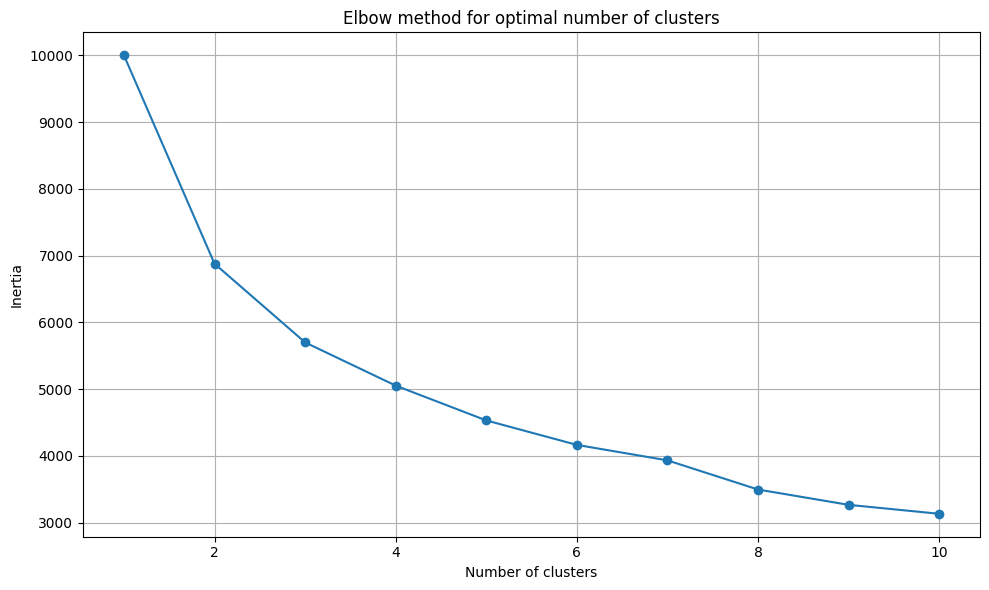

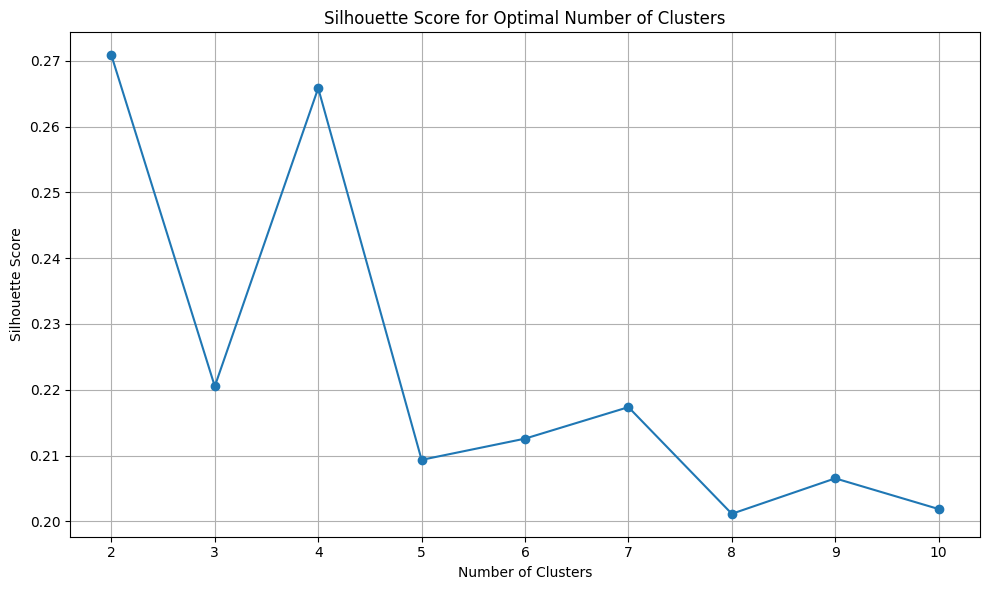

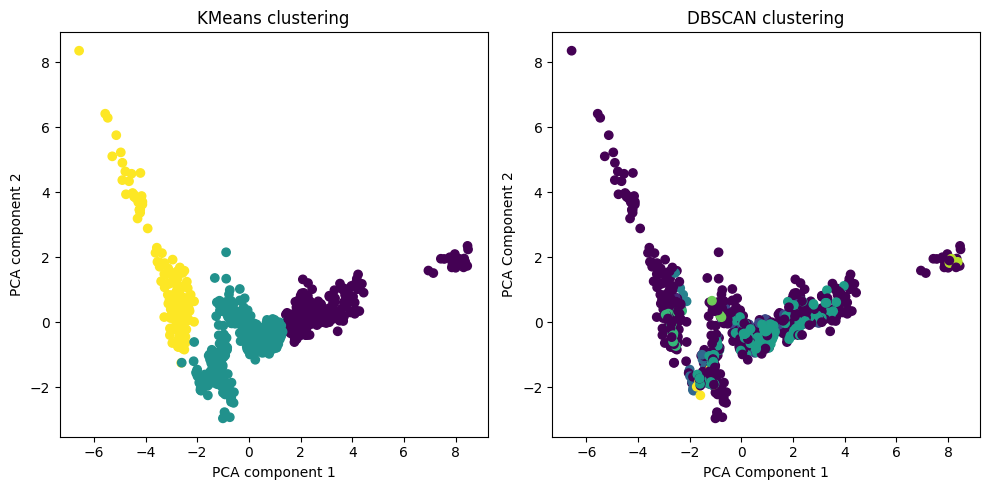

In [25]:
# Here, we are going to use conventional clustering methods such as Kmeans and DBSCAN to see if we can identify clusters of different stocks

# First, we scale the data in the dow_jones dataframe
scaler = StandardScaler()
numeric_cols = dow_jones.select_dtypes(include=["number"]).columns
normalized_data = scaler.fit_transform(dow_jones[numeric_cols])

# Apply PCA to retain 90% explained variance
pca_90 = PCA(n_components=0.90)  # Retain 90% variance
pca_90_components = pca_90.fit_transform(normalized_data)

# Print explained variance by component and cumulative variance
explained_variance_ratio = pca_90.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
print(f"Explained variance per component (90% PCA): {explained_variance_ratio}")
print(f"Cumulative explained variance (90% PCA): {cumulative_variance_ratio}")

# Elbow method
inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_90_components)
    inertia_values.append(kmeans.inertia_)

# Plotting the inertias
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia_values, marker="o")
plt.title("Elbow method for optimal number of clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.tight_layout()
plt.show()

# Silhouette score method
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(pca_90_components)
    silhouette_avg = silhouette_score(pca_90_components, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# plotting the average silhuetet scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker="o")
plt.title("Silhouette Score for Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.tight_layout()
plt.show()

# Determined from elbow method and silhouette score
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
dow_jones["kmeans_cluster"] = kmeans.fit_predict(pca_90_components)

# DBSCAN clustering
dbscan = DBSCAN(eps=1, min_samples=5) #params not finly adjusted
dow_jones["dbscan_cluster"] = dbscan.fit_predict(pca_90_components)

# Reduce data to 2d for visualization
pca_2d = PCA(n_components=2)
pca_2d_components = pca_2d.fit_transform(pca_90_components)

dow_jones["PCA1"] = pca_2d_components[:, 0]
dow_jones["PCA2"] = pca_2d_components[:, 1]

# Plot KMeans clustes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.scatter(dow_jones["PCA1"], dow_jones["PCA2"], c=dow_jones["kmeans_cluster"], cmap="viridis")
ax1.set_xlabel("PCA component 1")
ax1.set_ylabel("PCA component 2")
ax1.set_title("KMeans clustering")

# plot DBSCAN clusters
ax2.scatter(dow_jones["PCA1"], dow_jones["PCA2"], c=dow_jones["dbscan_cluster"], cmap="viridis")
ax2.set_xlabel("PCA Component 1")
ax2.set_ylabel("PCA Component 2")
ax2.set_title("DBSCAN clustering")

plt.tight_layout()
plt.show()

# Inspecting what stocks got clustered together in Kmenas
#for cluster_num in range(kmeans.n_clusters):
    #display(f"Cluster {cluster_num} (KMeans):")
    #unique_stocks = dow_jones[dow_jones["kmeans_cluster"] == cluster_num]["stock"].unique()
    #display(f"Cluster {cluster_num}: Unique stocks are: {unique_stocks}")

# Inspecting clusters for DBSCAN                              
#for cluster_num in set(dow_jones["dbscan_cluster"]):    
    #display(f"Cluster {cluster_num} (DBSCAN):")
    #display(dow_jones[dow_jones["dbscan_cluster"] == cluster_num].head())
    #display(f"Cluster {cluster_num}: {dow_jones[dow_jones["dbscan_cluster"] == cluster_num]["stock"].nunique()} unique stocks")

<div style="background-color:rgb(255, 132, 91); padding: 15px; border-radius: 5px; border: 1px solid #dcdcdc;">

# 5-B: Answer the Exploratory Question

- Select and apply the most suitable algorithm from lectures 1-8 to answer your
question. Justify your choice, document any transformations or hyperparameter
settings, and ensure the analysis generates meaningful and non-trivial insights.
Provide a concrete recommendation based on your findings.

</div>

<div style="background-color: #33a2ff; padding: 15px; border-radius: 5px; border: 1px solid #dcdcdc;">

**Exploratory questions**
- What is the trend and level? can we identify any seasonality or outliers?
- Can we uncover discords and motifs and how can they be understood in relation to our data?
- What external factors could have caused the discords? 

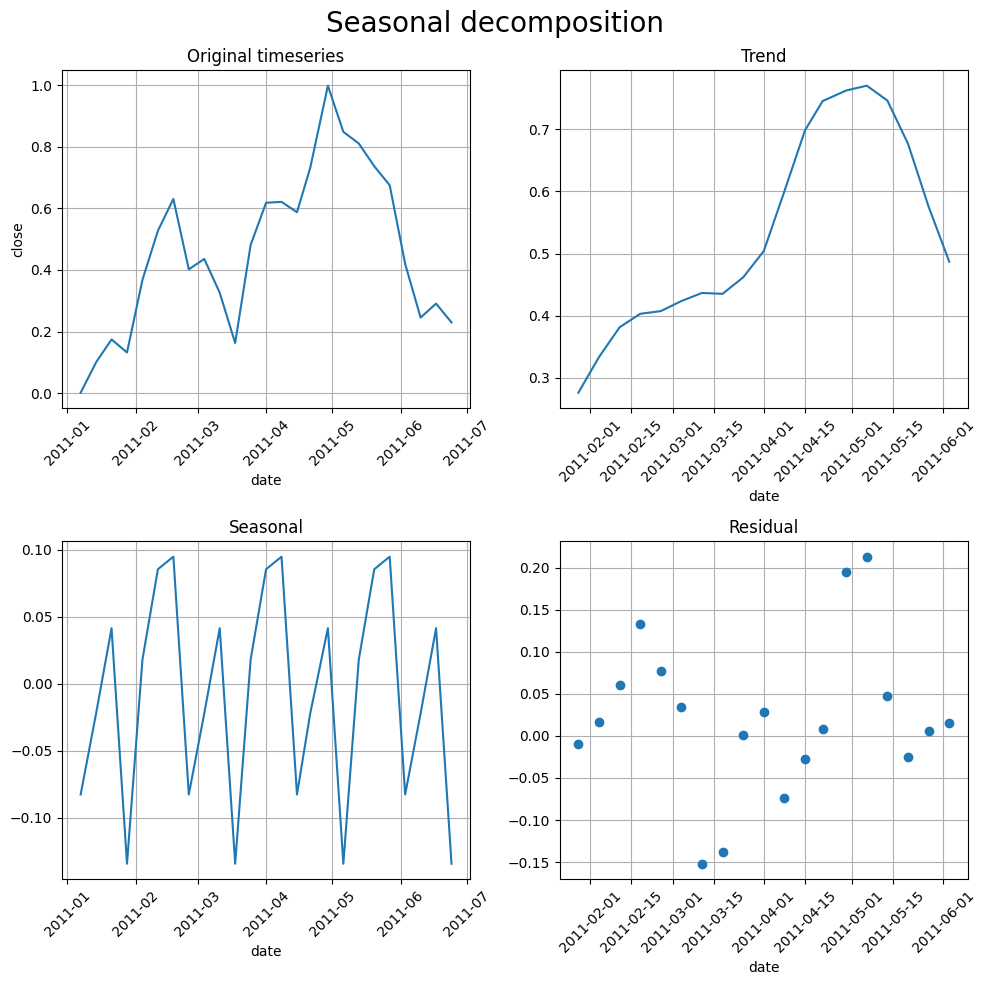

In [26]:
# Seasonal decomposition to reveal trend, seasonal component and residuals

# Applying seasonal decompotition with statsmodels.tsa
decomp = seasonal_decompose(close_df['close'], model='additive', period=7)     # We choose additive model here since the variance looks to be constant for this variable

# Plotting the different components manually since the method for this in the library is not as good
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Seasonal decomposition', fontsize=20)

sns.lineplot(data=close_df, x=close_df.index, y='close', ax=ax[0, 0])
ax[0, 0].set_title('Original timeseries') 
ax[0, 0].grid()
ax[0, 0].tick_params(axis='x', labelrotation = 45)

decomp.trend.plot(ax=ax[0, 1])
ax[0, 1].set_title('Trend')
ax[0, 1].grid()
ax[0, 1].tick_params(axis='x', labelrotation = 45)

decomp.seasonal.plot(ax=ax[1, 0])
ax[1, 0].set_title('Seasonal')
ax[1, 0].grid()
ax[1, 0].tick_params(axis='x', labelrotation = 45)

decomp.resid.plot(marker='o', ax=ax[1, 1], linewidth=0)
ax[1, 1].set_title('Residual')
ax[1, 1].grid()
ax[1, 1].tick_params(axis='x', labelrotation = 45)

plt.tight_layout()
plt.show()

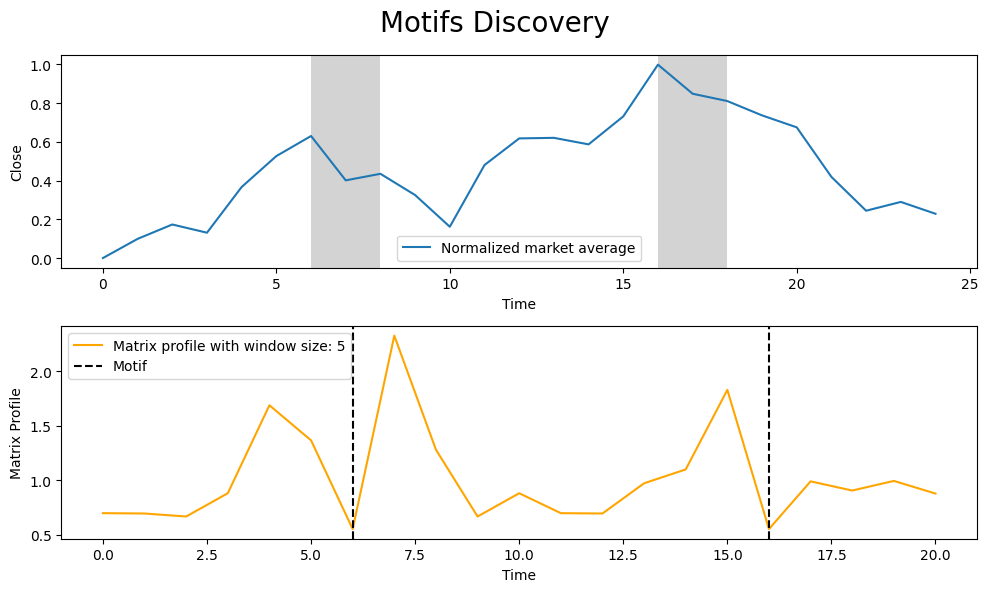

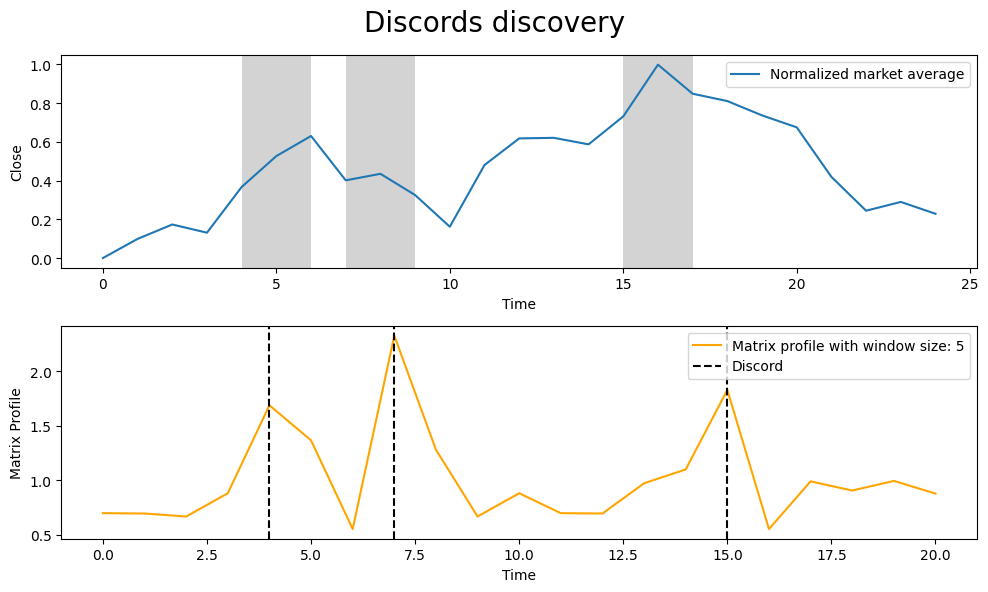

In [27]:
# Creating the matrix profile to find discords and motifs

# We use the stumpy library to create the profile. We set the rolling window size to 5 for this.
m=5
matrix_profile = stumpy.stump(close_df['close'], m=m)
profile = np.array(matrix_profile)[:, 0]

#Finding motifs by getting the index of the smallest values in the matrix profile
motif_idx = np.argsort(profile)[0]
nearest_neighbor_idx = matrix_profile[motif_idx, 1]

# Finding discords by getting the largest values
discord_idx1 = np.argsort(profile)[-1]
discord_idx2 = np.argsort(profile)[-2]
discord_idx3 = np.argsort(profile)[-3]

# Plotting the motif discovery, inspiration taken from the stumpy official documentation
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
plt.suptitle('Motifs Discovery', fontsize=20)

sns.lineplot(data=close_df, x=range(len(close_df.index)), y='close', ax=ax1, label='Normalized market average')
ax1.set_ylabel('Close')
ax1.set_xlabel('Time')
rect = Rectangle((motif_idx, -1), 2, 40, facecolor='lightgrey')
ax1.add_patch(rect)
rect = Rectangle((nearest_neighbor_idx, -1), 2, 40, facecolor='lightgrey')
ax1.add_patch(rect)

sns.lineplot(y=profile, x=range(len(profile)), label=f'Matrix profile with window size: {m}', ax=ax2, color='orange')
ax2.set_xlabel('Time')
ax2.set_ylabel('Matrix Profile')
ax2.axvline(x=motif_idx, linestyle="dashed", color='black', label='Motif')
ax2.axvline(x=nearest_neighbor_idx, linestyle="dashed", color='black')

plt.legend()
plt.tight_layout()
plt.show()

# Plotting the discord discovery
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
plt.suptitle('Discords discovery', fontsize=20)

sns.lineplot(data=close_df, x=range(len(close_df.index)), y='close', ax=ax1, label='Normalized market average')
ax1.set_ylabel('Close')
ax1.set_xlabel('Time')
rect = Rectangle((discord_idx1, -1), 2, 40, facecolor='lightgrey')
ax1.add_patch(rect)
rect = Rectangle((discord_idx2, -1), 2, 40, facecolor='lightgrey')
ax1.add_patch(rect)
rect = Rectangle((discord_idx3, -1), 2, 40, facecolor='lightgrey')
ax1.add_patch(rect)

sns.lineplot(y=profile, x=range(len(profile)), label=f'Matrix profile with window size: {m}', ax=ax2, color='orange')
ax2.set_xlabel('Time')
ax2.set_ylabel('Matrix Profile')
ax2.axvline(x=discord_idx1, linestyle="dashed", color='black', label='Discord')
ax2.axvline(x=discord_idx2, linestyle="dashed", color='black')
ax2.axvline(x=discord_idx3, linestyle="dashed", color='black')

plt.legend()
plt.tight_layout()
plt.show()

In [28]:
# We can identify periods around the discrods and use these time periods to find external sources that may have affected the DJIA. For this, we used ChatGPT to help us find some sources and summarize them for us. 
# Unfortunately, there are very few working sites with information about the DJIA during this time period. 

# Anomaly period 1 explanation (not in order as they appear in the timeseies)
anomaly_period1_start = close_df.index[discord_idx1]
anomaly_period1_end = close_df.index[discord_idx1 + m]
print(f'Anomaly period 1 starts {anomaly_period1_start} and ends {anomaly_period1_end}')

# Found these market reports to explain the market:
# https://www.marketwatch.com/story/us-stocks-decline-as-investors-mull-quakes-impact-djia-off-118-2011-03-14?utm_source=chatgpt.com

# Anomaly period 2 explanation
anomaly_period2_start = close_df.index[discord_idx2]
anomaly_period2_end = close_df.index[discord_idx2 + m]
print(f'Anomaly period 2 starts {anomaly_period2_start} and ends {anomaly_period2_end}')

# Found these market reports to explain the market:
# https://www.publishersweekly.com/pw/by-topic/industry-news/financial-reporting/article/47142-industry-stocks-april-2011-performances.html?utm_source=chatgpt.com
# https://www.arkansasonline.com/news/2011/jun/10/stocks-rise-1st-time-june-20110610/?utm_source=chatgpt.com


# Anomaly period 3 explanation
anomaly_period3_start = close_df.index[discord_idx3]
anomaly_period3_end = close_df.index[discord_idx3 + m]
print(f'Anomaly period 3 starts {anomaly_period3_start} and ends {anomaly_period3_end}')

# Found these market reports to explain the market:
# https://www.nasdaq.com/articles/5-worst-disasters-how-did-stock-market-react-2011-03-25?utm_source=chatgpt.com

Anomaly period 1 starts 2011-02-25 and ends 2011-04-01
Anomaly period 2 starts 2011-04-21 and ends 2011-05-27
Anomaly period 3 starts 2011-02-04 and ends 2011-03-11


<div style="background-color: #33a2ff; padding: 15px; border-radius: 5px; border: 1px solid #dcdcdc;">

**Exploratory questions**
- Can we find and use a clustering algorithm to perform unsupervised classification of the time series to find interesting classes? Can we relate the identified patterns to real-world factors?
- Can we combine insights from the time series components, the predicted classes and discords/motifs to generate new insights about the market?  

In [ ]:
# Timeseries clustering with Dynamic timewarping to compare and find similar stocks

# Used ChatGPT for the preprocessing since we could not figure out the ducomentation of cumcount() and pivot() on our own. 
all_stocks = dow_jones[['stock', 'close']]
all_stocks = pd.DataFrame(all_stocks)
all_stocks["group"] = all_stocks.groupby("stock").cumcount()
pivoted_df = all_stocks.pivot(index="group", columns="stock", values="close")
pivoted_df.reset_index(drop=True, inplace=True)
pivoted_df = pivoted_df.T
sacler = MinMaxScaler()
pivoted_arr = scaler.fit_transform(pivoted_df)
X_train_clsuter = pivoted_arr.reshape(pivoted_arr.shape[0], pivoted_arr.shape[1], 1)

X_train_clsuter = TimeSeriesResampler(sz=25).fit_transform(X_train_clsuter)
X_train_cluster= TimeSeriesScalerMeanVariance().fit_transform(X_train_clsuter)

# Creating a function to find the lowest average silhuette score 
def find_optimal_k(data, clusters):
    sil_scores = {}
    for n_clusters in clusters:
        model = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", random_state=42)
        y_pred = model.fit_predict(data)
        distance_matrix = cdist_dtw(X_train_cluster)

        # Compute and store the silhuette scores
        sil_avg = silhouette_score(distance_matrix, y_pred,  metric="precomputed")
        sil_scores[n_clusters] = sil_avg
    return sil_scores

# Calling the function to find the optimal k
n_clusters_to_try = range(2, 10, 1)
sil_scores = find_optimal_k(X_train_clsuter, n_clusters_to_try)
print(sil_scores)

# Creating the model and making a preduction
final_model = TimeSeriesKMeans(n_clusters=optimal_k, metric="dtw", random_state=42)
y_pred = final_model.fit_predict(X_train_cluster)

# Plotting taken from the TSLearn official documentation
plt.figure(figsize=(10, 6))
plt.suptitle('Timeseries clustering with DTW')
for yi in range(optimal_k):
    plt.subplot(optimal_k, 1, 1 + yi)
    for xx in X_train_clsuter[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.3)
    plt.plot(final_model.cluster_centers_[yi].ravel(), color="red")
    plt.title("Cluster %d" % (yi + 1))
plt.tight_layout()
plt.show()

{2: -0.005742118177162319, 3: -0.09030586546456716, 4: -0.11345389609378488, 5: -0.16792807552756253, 6: -0.20556018145963711, 7: -0.18800310646402738, 8: -0.16321536564901834, 9: -0.2081718750609897}


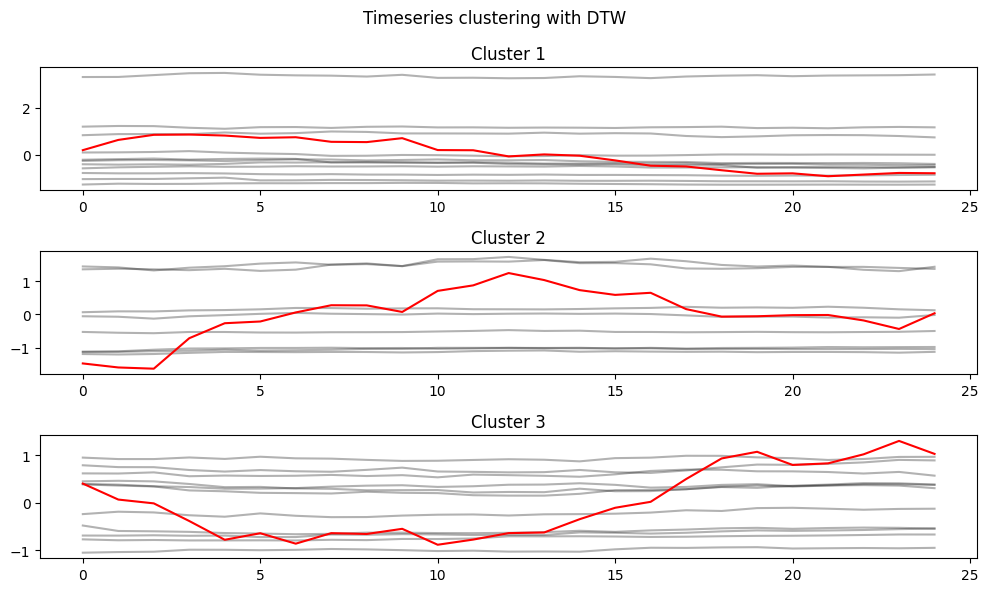

In [ ]:
# Timeseries clustering with Euclidean distance to compare and find similar stocks

# Creating a function to find the lowest average silhuette score 
def find_optimal_k_euclidean(data, clusters):
    sil_scores = {}
    for n_clusters in clusters:
        model = TimeSeriesKMeans(n_clusters=n_clusters, random_state=42)
        y_pred = model.fit_predict(data)
        distance_matrix = cdist_dtw(X_train_cluster)

        # Compute and store the silhuette scores
        sil_avg = silhouette_score(distance_matrix, y_pred,  metric="precomputed")
        sil_scores[n_clusters] = sil_avg
    return sil_scores

# Calling the function to find the optimal k
n_clusters_to_try = range(2, 10, 1)
sil_scores = find_optimal_k_euclidean(X_train_clsuter, n_clusters_to_try)
print(sil_scores)

# Creating the model and making a preduction
final_model = TimeSeriesKMeans(n_clusters=optimal_k, random_state=42)
y_pred = final_model.fit_predict(X_train_cluster)

# Plotting taken from the TSLearn documentation
plt.figure(figsize=(10, 6))
plt.suptitle('Timeseries clustering with DTW')
for yi in range(optimal_k):
    plt.subplot(optimal_k, 1, 1 + yi)
    for xx in X_train_clsuter[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.3)
    plt.plot(final_model.cluster_centers_[yi].ravel(), color="red")
    plt.title("Cluster %d" % (yi + 1))
plt.tight_layout()
plt.show()

<div style="background-color:rgb(255, 132, 91); padding: 15px; border-radius: 5px; border: 1px solid #dcdcdc;">

# 5-C: Answer the Predictive Question
</div>

<div style="background-color: #33a2ff; padding: 15px; border-radius: 5px; border: 1px solid #dcdcdc;">

1. **Split the data**:
- Split your data into training (80%) and testing (20%) sets, with an additional 20% of
the training data reserved for validation. 

-------------------------------------------------------------------------------------------------------------------------------------------
ADF statistic before differencing: -1.1563923998242833
P-value: 0.6920678706569802
Used lag: 8
Number of observations used for ADF test: 16
Critical values: {'1%': -3.9240193847656246, '5%': -3.0684982031250003, '10%': -2.67389265625}
Conclusion: 
Fail to reject the null hypothesis - the series has a unit root (non-stationary)
-------------------------------------------------------------------------------------------------------------------------------------------
ADF statistic before differencing: -3.9776688246541094
P-value: 0.0015320653120073817
Used lag: 0
Number of observations used for ADF test: 23
Critical values: {'1%': -3.7529275211638033, '5%': -2.998499866852963, '10%': -2.6389669754253307}
Conclusion: 
Reject the null hypothesis - The series is stationary
----------------------------------------------------------------------------------

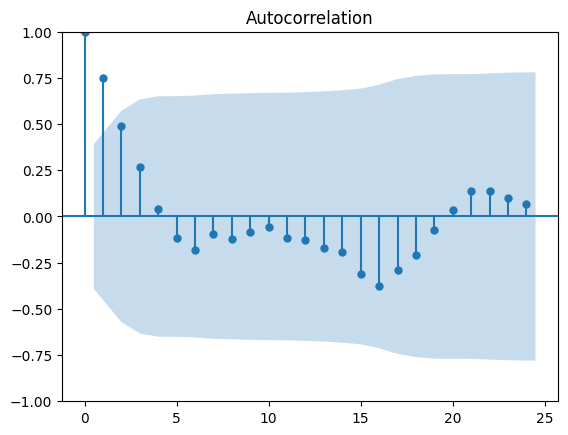

To further support the claim that the data is stationary after differntiating, the ACF plot does not seem to show signs of seasonality


In [ ]:
# Double checking for stationarity with augmented dickey fuller 
adf_result = adfuller(close_df["close"])

print("-------------------------------------------------------------------------------------------------------------------------------------------")
print(f"ADF statistic before differencing: {adf_result[0]}\nP-value: {adf_result[1]}\nUsed lag: {adf_result[2]}\nNumber of observations used for ADF test: {adf_result[3]}\nCritical values: {adf_result[4]}\nConclusion: ")
if adf_result[1] < 0.05:
    print("Reject the null hypothesis - the series is stationary")
else:
    print("Fail to reject the null hypothesis - the series has a unit root (non-stationary)")


close_df["close_diff"] = close_df["close"].diff()
close_df_dropped = close_df.dropna()
adf_result_diff_1 = adfuller(close_df_dropped["close_diff"])
close_df = close_df.drop(columns=['close_diff'])


print("-------------------------------------------------------------------------------------------------------------------------------------------")
print(f"ADF statistic before differencing: {adf_result_diff_1[0]}\nP-value: {adf_result_diff_1[1]}\nUsed lag: {adf_result_diff_1[2]}\nNumber of observations used for ADF test: {adf_result_diff_1[3]}\nCritical values: {adf_result_diff_1[4]}\nConclusion: ")
if adf_result_diff_1[1] < 0.05:
    print("Reject the null hypothesis - The series is stationary")
else:
    print("Fail to reject the null hypothesis - The series has a unit root (non-stationary)")
print("-------------------------------------------------------------------------------------------------------------------------------------------")
print("After first order differentiating of the data it is now stationary according to the ADF test, which means we can later train a sarima model on the data after differentiating once")
print("-------------------------------------------------------------------------------------------------------------------------------------------")

plot_acf(close_df["close"], lags=24)
plt.show()
print("To further support the claim that the data is stationary after differntiating, the ACF plot does not seem to show signs of seasonality")


# Since stock markets are typically not stationary and contains trend ans seasonality components as seen in the decomposition, 
# we will still use a SARIMA model to predict future values. We tried applying a box-cox transformation to remove non-constant variance,
# But this had little to no effect on the data. Furtermore, we have decalared stationarity of the timeseries according to the adfuller test above.

# Box cox transformation 
#close_df = close_df.assign(close=boxcox(close_df['close'])[0])

#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

#sns.lineplot(data=close_df, x=close_df.index, y='close', ax=ax1)
#sns.lineplot(data=close_df, x=close_df.index, y='close', ax=ax2)
#ax1.grid()
#ax2.grid()
#ax1.tick_params(axis='x', labelrotation = 45)
#ax2.tick_params(axis='x', labelrotation = 45)
#ax1.set_title('Original', fontsize=20)
#ax2.set_title('After box-cox transformation', fontsize=20)
#plt.tight_layout()
#plt.show()

# For our purposes, we are splitting the data into only training and testing sets since we can otherwise not make a forecast with the provided libraries without having data leakage. 
# 80/20 split
X_train = close_df.iloc[:20]
X_test = close_df.iloc[20:]

<div style="background-color: #33a2ff; padding: 15px; border-radius: 5px; border: 1px solid #dcdcdc;">

2. **Build and improve the model**:

- Build and improve your model through at least 5 iterations. Start with a simple
model (e.g., linear or logistic regression), and improve it by modifying datasets,
algorithms, or hyperparameters. Document each change. 

3. **Report model performance**:
- Regression: Mean Squared Error (MSE). 

***Predictive questions***:
- Can we create a SARIMA model to accurately predict the value of the Dow Jones index/market average in a given timeframe? If not, what other models can yield better results? 
- What timeseries decomposition methods work best for improving the predictions and/or efficiency of our model? 
- Can we in other ways engineer the features to improve the accuracy and or efficiency of our model? 
- What method of hyperparameter tuning works best for our model? 

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[2]             : AIC=inf, Time=0.06 sec
 ARIMA(0,1,0)(0,1,0)[2]             : AIC=2.280, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[2]             : AIC=-1.636, Time=0.03 sec
 ARIMA(0,1,1)(0,1,1)[2]             : AIC=inf, Time=0.06 sec
 ARIMA(1,1,0)(0,1,0)[2]             : AIC=4.266, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[2]             : AIC=-0.074, Time=0.05 sec
 ARIMA(1,1,0)(1,1,1)[2]             : AIC=inf, Time=0.08 sec
 ARIMA(1,1,0)(0,1,1)[2]             : AIC=inf, Time=0.11 sec
 ARIMA(1,1,0)(2,1,1)[2]             : AIC=inf, Time=0.15 sec
 ARIMA(0,1,0)(1,1,0)[2]             : AIC=-3.547, Time=0.02 sec
 ARIMA(0,1,0)(2,1,0)[2]             : AIC=-2.031, Time=0.03 sec
 ARIMA(0,1,0)(1,1,1)[2]             : AIC=inf, Time=0.07 sec
 ARIMA(0,1,0)(0,1,1)[2]             : AIC=inf, Time=0.05 sec
 ARIMA(0,1,0)(2,1,1)[2]             : AIC=inf, Time=0.13 sec
 ARIMA(0,1,1)(1,1,0)[2]             : AIC=-1.657, Time=0.03 sec
 ARIMA(1,1,1)(1,1,0)[2]

C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


 ARIMA(1,1,1)(0,1,0)[4]             : AIC=2.169, Time=0.04 sec
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=-1.789, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=-0.450, Time=0.04 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=-2.614, Time=0.09 sec
 ARIMA(0,1,1)(0,1,0)[4]             : AIC=0.179, Time=0.02 sec
 ARIMA(0,1,1)(1,1,1)[4]             : AIC=inf, Time=0.12 sec
 ARIMA(0,1,1)(0,1,2)[4]             : AIC=inf, Time=0.20 sec
 ARIMA(0,1,1)(1,1,0)[4]             : AIC=-0.450, Time=0.06 sec
 ARIMA(0,1,1)(1,1,2)[4]             : AIC=inf, Time=0.19 sec
 ARIMA(0,1,0)(0,1,1)[4]             : AIC=-4.593, Time=0.04 sec
 ARIMA(0,1,0)(1,1,1)[4]             : AIC=inf, Time=0.09 sec
 ARIMA(0,1,0)(0,1,2)[4]             : AIC=inf, Time=0.07 sec
 ARIMA(0,1,0)(1,1,0)[4]             : AIC=-2.450, Time=0.02 sec
 ARIMA(0,1,0)(1,1,2)[4]             : AIC=inf, Time=0.14 sec
 ARIMA(1,1,0)(0,1,1)[4]             : AIC=inf, Time=0.07 sec
 ARIMA(1,1,1)(0,1,1)[4]             : AIC=inf, Time=0.17 sec
 A

C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


 ARIMA(1,1,0)(1,1,0)[7]             : AIC=-3.284, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=-3.741, Time=0.06 sec
 ARIMA(0,1,0)(1,1,0)[7]             : AIC=-3.451, Time=0.03 sec
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=-3.449, Time=0.05 sec
 ARIMA(0,1,0)(1,1,1)[7]             : AIC=-1.451, Time=0.04 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=-3.221, Time=0.02 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=-3.978, Time=0.03 sec
 ARIMA(0,1,1)(1,1,0)[7]             : AIC=-3.805, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=-1.805, Time=0.06 sec
 ARIMA(0,1,2)(0,1,0)[7]             : AIC=-2.048, Time=0.07 sec
 ARIMA(1,1,2)(0,1,0)[7]             : AIC=inf, Time=0.08 sec
 ARIMA(0,1,1)(0,1,0)[7] intercept   : AIC=-2.110, Time=0.04 sec

Best model:  ARIMA(0,1,1)(0,1,0)[7]          
Total fit time: 0.659 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=-1.334, Time=0.05 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-3.146,

C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-1.112, Time=0.07 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-1.146, Time=0.02 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=-1.146, Time=0.05 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=0.854, Time=0.03 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-1.159, Time=0.02 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-3.118, Time=0.06 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=-1.564, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,1,0)[12]          
Total fit time: 0.377 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[16]             : AIC=1.444, Time=0.07 sec
 ARIMA(0,1,0)(0,1,0)[16]             : AIC=-0.532, Time=0.02 sec


C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


 ARIMA(1,1,0)(1,1,0)[16]             : AIC=2.005, Time=0.33 sec
 ARIMA(0,1,1)(0,1,1)[16]             : AIC=2.305, Time=0.14 sec
 ARIMA(0,1,0)(1,1,0)[16]             : AIC=1.468, Time=0.04 sec
 ARIMA(0,1,0)(0,1,1)[16]             : AIC=1.468, Time=0.06 sec
 ARIMA(0,1,0)(1,1,1)[16]             : AIC=3.468, Time=0.08 sec
 ARIMA(1,1,0)(0,1,0)[16]             : AIC=0.022, Time=0.03 sec
 ARIMA(0,1,1)(0,1,0)[16]             : AIC=0.306, Time=0.06 sec
 ARIMA(0,1,0)(0,1,0)[16] intercept   : AIC=-1.951, Time=0.01 sec
 ARIMA(0,1,0)(1,1,0)[16] intercept   : AIC=0.049, Time=0.08 sec
 ARIMA(0,1,0)(0,1,1)[16] intercept   : AIC=0.049, Time=0.03 sec
 ARIMA(0,1,0)(1,1,1)[16] intercept   : AIC=2.049, Time=0.05 sec
 ARIMA(1,1,0)(0,1,0)[16] intercept   : AIC=4264.799, Time=0.03 sec
 ARIMA(0,1,1)(0,1,0)[16] intercept   : AIC=-0.670, Time=0.10 sec
 ARIMA(1,1,1)(0,1,0)[16] intercept   : AIC=1.329, Time=0.15 sec

Best model:  ARIMA(0,1,0)(0,1,0)[16] intercept
Total fit time: 1.302 seconds

All AIC scores: [{2:

C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g.

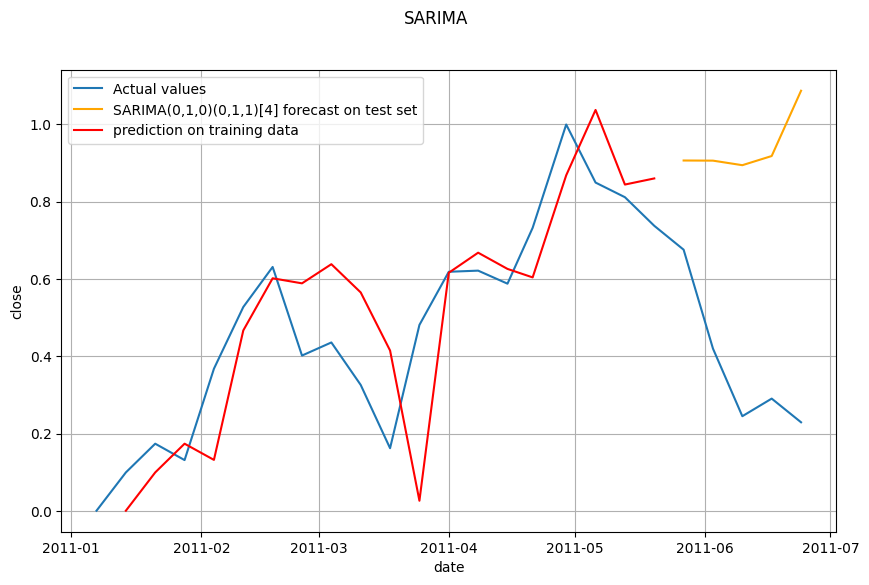

MSE on seen data: 0.029923431518400864
MSE on forecasted (unseen) data: 0.367368030726548


In [12]:
# Iteration 1 - Auto arima to find the best model with grid search.

# Creating a SARIMA model that automatically finds the model with the lowest AIC score though iterating over different 
# combinations of p,d,q,P,D,Q paramters. Since the m parameter of the seasonal component does not affect the AIC score

m_vals_to_try = [2, 4, 7, 12, 16]    
aic_scores = []

for m in m_vals_to_try:
    auto_model = auto_arima(X_train, 
                    
                    start_p=1,
                    start_q=1, 
                    d=1, 
                    max_p=10, 
                    max_q=10, 
                    
                    start_P=0,
                    start_Q=0,
                    D=1,
                    max_P=10,
                    max_Q=10,

                    m=m,
                    
                    information_criterion='aic',
                    trace=True, 
                    error_action='ignore',
                    suppress_warnings=True, 
                    stepwise=True)

    auto_model.fit(X_train)
    aic_scores.append({m:auto_model.aic()})
    forecast = auto_model.predict(n_periods=len(X_test))

# Based on this, we can see that the model with m=1 has the lowest AIC score, which means it has the best fit. 
print(f'\nAll AIC scores: {aic_scores}\n')
# Best model:  ARIMA(0,1,0)(0,1,1)[4]     

# Creating a new SARIMA model with the best parameters and making a prediction
sarima_model = ARIMA(X_train, order=(0,1,0), seasonal_order=(0,1,1,4)).fit()
prediction = sarima_model.predict(start=X_train.index[1], end=X_train.index[-1], n_periods = len(X_train.index))
forecast = sarima_model.forecast(len((X_test)))

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plt.suptitle(f'SARIMA')

sns.lineplot(data=close_df, x=close_df.index, y='close', label='Actual values')
sns.lineplot(y=forecast, x=X_test.index, color='orange', label='SARIMA(0,1,0)(0,1,1)[4] forecast on test set')
sns.lineplot(x=X_train.index[1:], y=prediction.values, color='red', label='prediction on training data')
ax.grid()

plt.tight_layout
plt.legend()
plt.show()

# Getting the mean squared error on the predictions and forecasts
mse_history = {}

mse_pred = mean_squared_error(X_train[1:], prediction)
mse_forecast = mean_squared_error(X_test, forecast)
print(f'MSE on seen data: {mse_pred}')
print(f'MSE on forecasted (unseen) data: {mse_forecast}')

mse_history['Iteration 1 prediction MSE'] = mse_pred
mse_history['Iteration 1 forecast MSE'] = mse_forecast

C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible

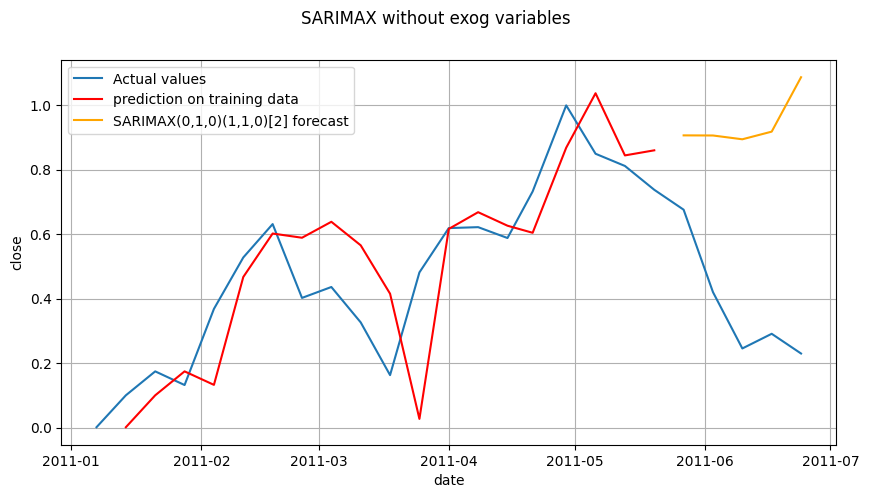

MSE on seen data: 0.029923431518400864
MSE on forecasted (unseen) data: 0.367368030726548


In [13]:
# Iteration 2 - SARIMAX model without exogenous variables

# Fit the SARIMAX model
sarimax_model = SARIMAX(X_train, order=(0,1,0), seasonal_order=(0,1,1,4)).fit(disp=False)
prediction = sarimax_model.predict(start=X_train.index[1], end=X_train.index[-1], n_periods = len(X_train.index))
forecast = sarimax_model.forecast(steps=len(X_test))

# PLotting 
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plt.suptitle(f'SARIMAX without exog variables')
sns.lineplot(data=close_df, x=close_df.index, y='close', label='Actual values')
sns.lineplot(x=X_train.index[1:], y=prediction.values, color='red', label='prediction on training data')
sns.lineplot(y=forecast, x=X_test.index, color='orange', label='SARIMAX(0,1,0)(1,1,0)[2] forecast')
ax.grid()
plt.tight_layout
plt.legend()
plt.show()

# Getting the mean squared error on the predictions and forecasts
mse_pred = mean_squared_error(X_train[1:], prediction)
mse_forecast = mean_squared_error(X_test, forecast)
print(f'MSE on seen data: {mse_pred}')
print(f'MSE on forecasted (unseen) data: {mse_forecast}')

mse_history['Iteration 2 prediction MSE'] = mse_pred
mse_history['Iteration 2 forecast MSE'] = mse_forecast

C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible

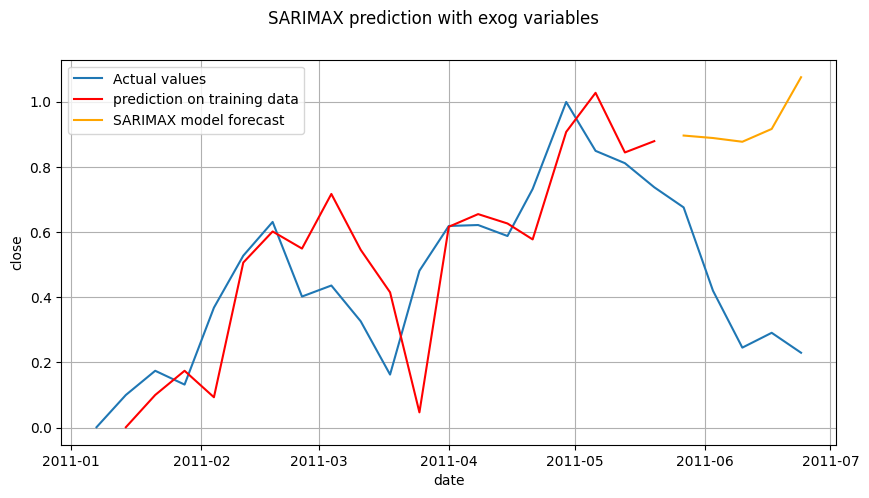

MSE on seen data: 0.030685207247545077
MSE on forecasted (unseen) data: 0.3546033273002297


In [14]:
# Iteration 3 - SARIMAX model with exogenous variables provided by the identified discords from the matrix profile

# Get the discords from earlier and make an ordered array with 1 where they appear, else 0.
top_three = sorted(list(profile), reverse=True)[:3]
exog_arr = np.array([1 if val in top_three and top_three.count(val) > 0 and top_three.remove(val) is None else 0 for val in profile]).reshape(-1, 1)
exog_train = exog_arr[:20]

# Fit the SARIMAX model
sarimax_model = SARIMAX(X_train, order=(0,1,0), seasonal_order=(0,1,1,4), exog=exog_train).fit(disp=False)
prediction = sarimax_model.predict(start=X_train.index[1], end=X_train.index[-1], n_periods = len(X_train.index))
forecast = sarimax_model.forecast(steps=len(X_test), exog=np.zeros((5, 1)))     # Forecast requires exogenous variables to be provided as well. Here, we use a placeholder array with zeros since we can not predict the exogenous variables themselves. 

# Plotting 
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plt.suptitle(f'SARIMAX prediction with exog variables ')
sns.lineplot(data=close_df, x=close_df.index, y='close', label='Actual values')
sns.lineplot(x=X_train.index[1:], y=prediction.values, color='red', label='prediction on training data')
sns.lineplot(y=forecast, x=X_test.index, color='orange', label='SARIMAX model forecast')
ax.grid()
plt.tight_layout
plt.legend()
plt.show()

# Getting the mean squared error on the predictions and forecasts
mse_pred = mean_squared_error(X_train[1:], prediction)
mse_forecast = mean_squared_error(X_test, forecast)
print(f'MSE on seen data: {mse_pred}')
print(f'MSE on forecasted (unseen) data: {mse_forecast}')

mse_history['Iteration 3 prediction MSE'] = mse_pred
mse_history['Iteration 3 forecast MSE'] = mse_forecast

C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible

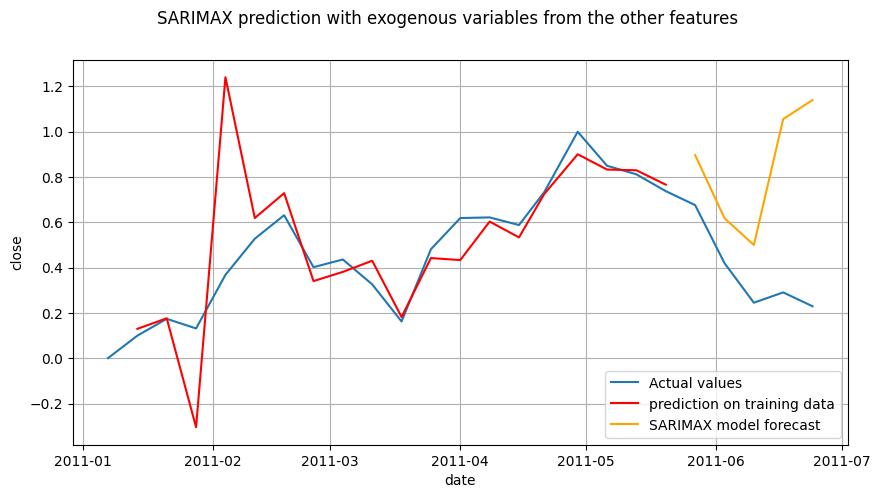

MSE on seen data: 0.05454556702760115
MSE on forecasted (unseen) data: 0.3127853713230172


In [15]:
# Iteration 4 - SARIMAX model with exogenous variables from the other features

# Engineering the features to fit the model
scaler = MinMaxScaler()
dow_jones_scaled = dow_jones.copy()
dow_grouped = dow_jones_scaled.groupby("date")[numeric_cols].mean().reset_index()
dow_grouped = dow_grouped.sort_values(by="date").reset_index(drop=True)
dow_grouped[numeric_cols] = scaler.fit_transform(dow_grouped[numeric_cols])
exog_vars = dow_grouped.drop(columns=["close", "date"])
exog_train = exog_vars.to_numpy()[:20]

# Fit the SARIMAX model
sarimax_model = SARIMAX(X_train, order=(0,1,0), seasonal_order=(0,1,1,4), exog=exog_train).fit(disp=False)
prediction = sarimax_model.predict(start=X_train.index[1], end=X_train.index[-1], n_periods = len(X_train.index))
forecast = sarimax_model.forecast(steps=len(X_test), exog=np.zeros((5, 13)))     # Forecast requires exogenous variables to be provided as well. Here, we use a placeholder array with zeros since we can not predict the exogenous variables themselves. 

# Plotting 
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plt.suptitle(f'SARIMAX prediction with exogenous variables from the other features')
sns.lineplot(data=close_df, x=close_df.index, y='close', label='Actual values')
sns.lineplot(x=X_train.index[1:], y=prediction.values, color='red', label='prediction on training data')
sns.lineplot(y=forecast, x=X_test.index, color='orange', label='SARIMAX model forecast')
ax.grid()
plt.tight_layout
plt.legend()
plt.show()

# Getting the mean squared error on the predictions and forecasts
mse_pred = mean_squared_error(X_train[1:], prediction)
mse_forecast = mean_squared_error(X_test, forecast)
print(f'MSE on seen data: {mse_pred}')
print(f'MSE on forecasted (unseen) data: {mse_forecast}')

mse_history['Iteration 4 prediction MSE'] = mse_pred
mse_history['Iteration  forecast MSE'] = mse_forecast

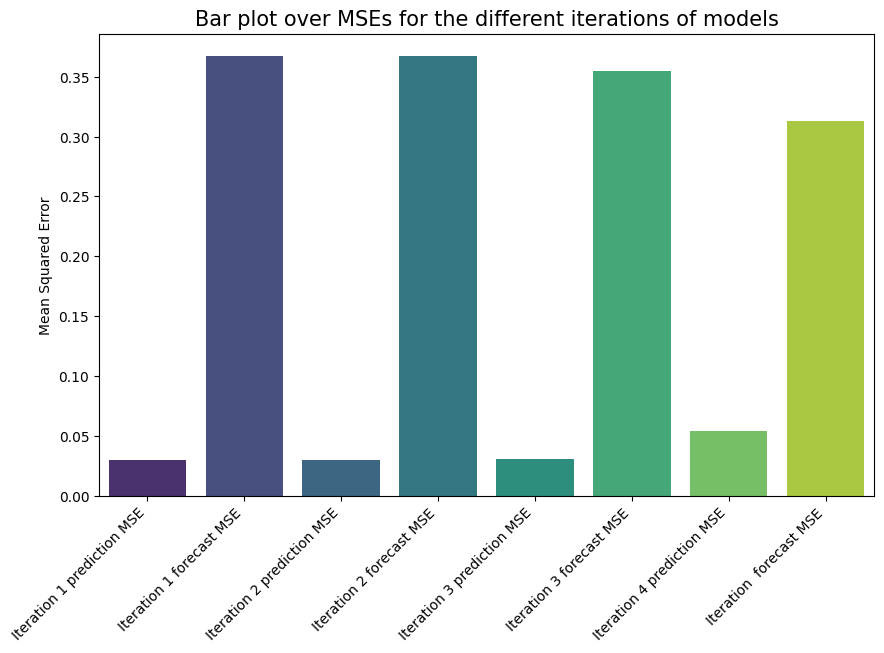

In [16]:
# Bar plot of MSEs for the first 4 iterations of the model. 
mse_df = pd.DataFrame([mse_history])
plt.figure(figsize=(10,6))
sns.barplot(data=mse_df, palette='viridis')
plt.title('Bar plot over MSEs for the different iterations of models', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Mean Squared Error')
plt.show()

C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra

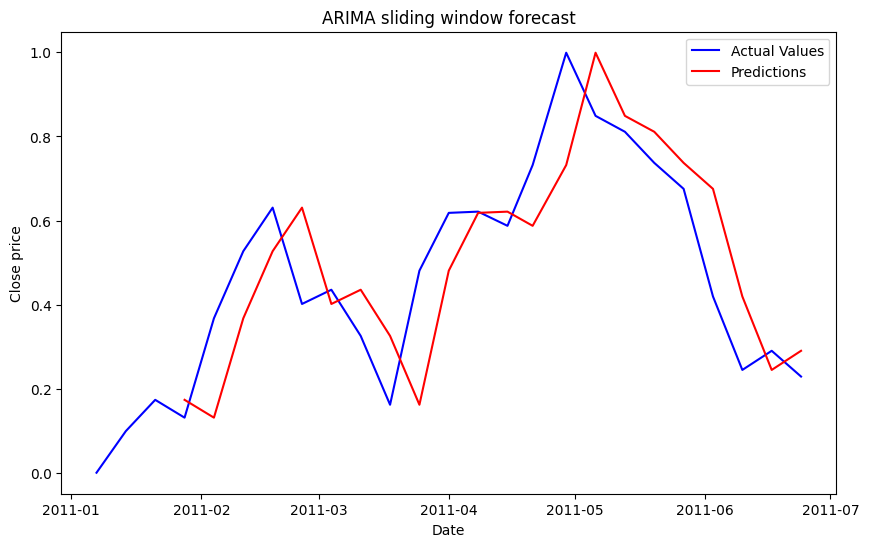

MSE of the rolling forecast: 0.024294232176829276


In [17]:
# Iteration 5 - Expanding window approach with simpler ARIMA model. 

# This is a fundamentally different approach than the previous iteration, which makes it hard to compare the results. 
initial_training_window_size = 3
forecast_steps = 1

# function to run expaning window arima, plot the results and return predictions, actual values and params for the model. 
def run_arima (window_size, forecast_steps, data, order):
    
    predictions = []
    actual_values = []

    for i in range(window_size, len(data)):
    
        # Increasing the training data for each iteration
        train_data = data["close"].iloc[0:i]
        test_data = data["close"].iloc[i]

        # Retraining the model for each iteration
        arima_model = ARIMA(train_data, order=order) 
        arima_results = arima_model.fit()
    
        # Forecasting
        forecast = arima_results.forecast(steps=forecast_steps)
        predictions.append(forecast.to_numpy()[0])
        actual_values.append(test_data)

    # Plotting
    rolling_predictions_series = pd.Series(predictions, index=close_df.index[window_size:])
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, close_df["close"], label="Actual Values", color="blue")
    plt.plot(rolling_predictions_series.index, rolling_predictions_series, label="Predictions", color="red")
    plt.legend()
    plt.title("ARIMA sliding window forecast")
    plt.xlabel("Date")
    plt.ylabel("Close price")
    plt.show()

    # Getting and printing the MSE score
    mse = mean_squared_error(actual_values, predictions)
    print(f"MSE of the rolling forecast: {mse}")
    
    return predictions, actual_values, mse,

best_predictions, actual2, mse2 =  run_arima(3, 1, close_df, order=(0,1,0))

C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\victo\AppData\Local\Packages

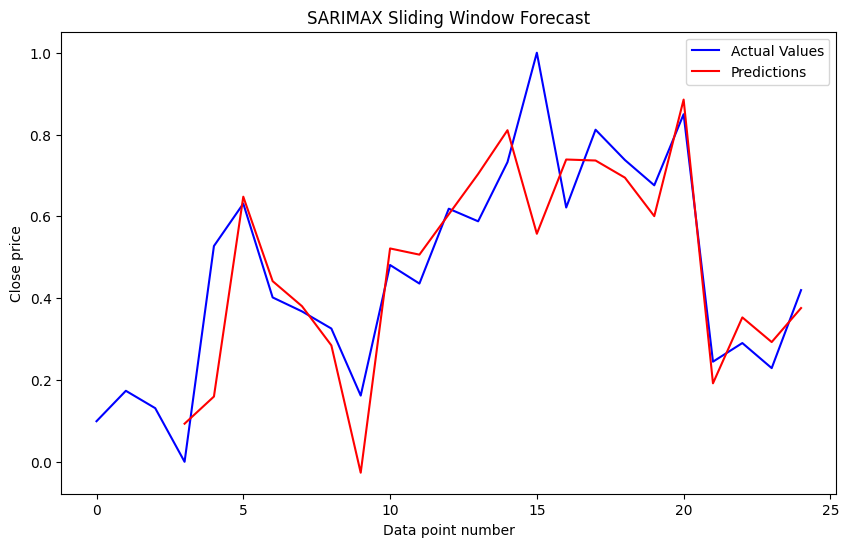

MSE of the rolling forecast: 0.02029507102429221


In [18]:
# Iteration 6 - Expanding window approach with SARIMAX model. 

# Function to iteratively train and predict a new SARIMAX model. We can not incorporate a seasonal component for this since the rolling window structure does not allow it.
def run_sarimax(window_size, forecast_steps, data, order, seasonal_order=None, exog=None):

    predictions = []
    actual_values = []
    params = {"order": order, "seasonal_order": seasonal_order}

    for i in range(window_size, len(data)):
        
        # Iteratively increasing the training data, this time also for the exogenous variables
        train_data = data["close"].iloc[0:i]
        test_data = data["close"].iloc[i]
        exog_train = exog.iloc[0:i] if exog is not None else None
        exog_test = exog.iloc[i:i + forecast_steps] if exog is not None else None

        # Re-training the model each iteration
        sarimax_model = SARIMAX(
            train_data,
            order=order,
            seasonal_order=seasonal_order,
            exog=exog_train
        )
        sarimax_results = sarimax_model.fit(disp=False)

        # Forecast
        forecast = sarimax_results.forecast(steps=forecast_steps, exog=exog_test)
        predictions.append(forecast.to_numpy()[0])
        actual_values.append(test_data)

    # Create Series for plotting
    rolling_predictions_series = pd.Series(predictions, index=data.index[window_size:])
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data["close"], label="Actual Values", color="blue")
    plt.plot(rolling_predictions_series.index, rolling_predictions_series, label="Predictions", color="red")
    plt.legend()
    plt.title("SARIMAX Sliding Window Forecast")
    plt.xlabel("Data point number")
    plt.ylabel("Close price")
    plt.show()

    # Getting and printing the MSE 
    mse = mean_squared_error(actual_values, predictions)
    print(f"MSE of the rolling forecast: {mse}")

    return predictions, actual_values, mse, params

target = dow_grouped[["close"]]
predictions_sarimax, actual_values, mse, params = run_sarimax(3, 1, target, (0, 1, 0), seasonal_order=None, exog=exog_vars)

<div style="background-color: #33a2ff; padding: 15px; border-radius: 5px; border: 1px solid #dcdcdc;">

**Bonus - trading algorithm based on predictions**

Bankroll after trading: 104620.86641017185


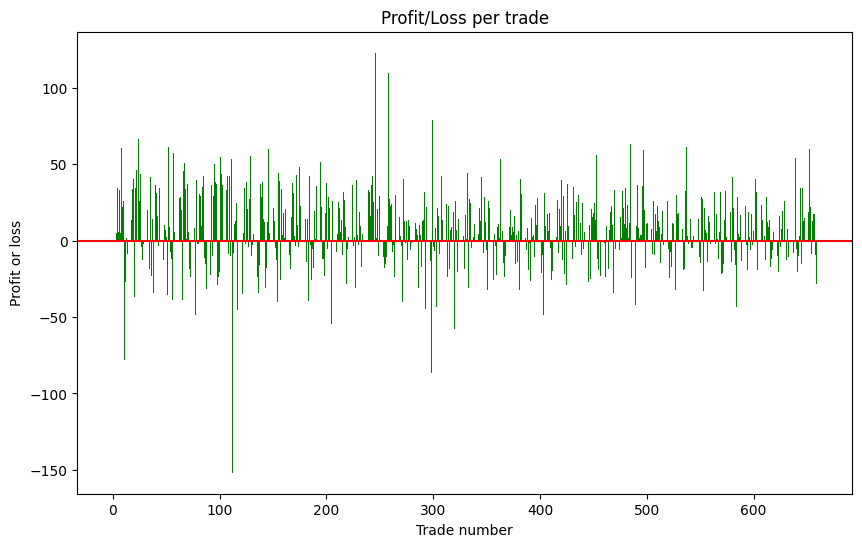

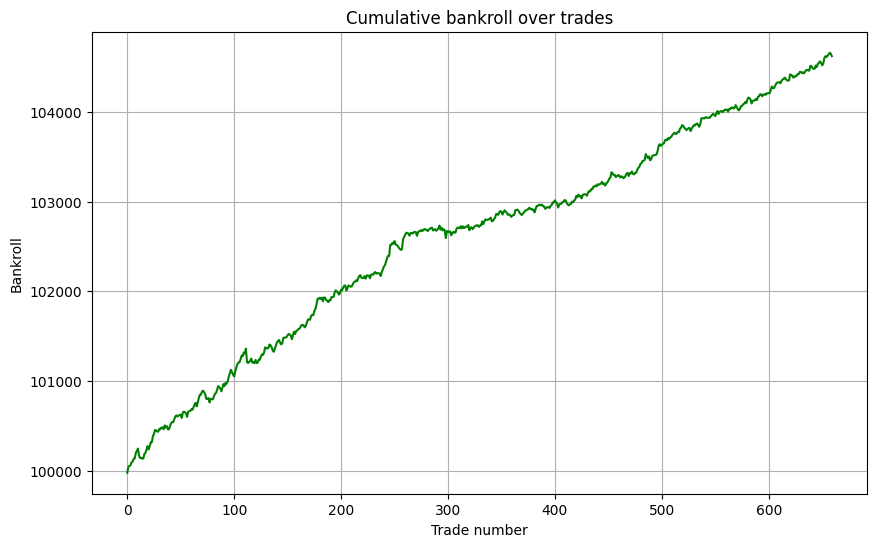

In [ ]:
# Defining and trying a trading strategy based of our predictions

# Function to determine which days to buy and which day to short
def dates_to_buy_short(predictions, normalized_agg_data):
    normalized_agg_data["predictions"] = np.nan
    start_index = len(normalized_agg_data) - len(predictions)
    normalized_agg_data.iloc[start_index:, normalized_agg_data.columns.get_loc("predictions")] = predictions

    dates_to_buy = []
    dates_to_short = []
    
    for i in range(len(normalized_agg_data) - 1):
        if normalized_agg_data["close"].iloc[i] < normalized_agg_data["predictions"].iloc[i + 1] and not np.isnan(normalized_agg_data["predictions"].iloc[i + 1]):
            dates_to_buy.append(normalized_agg_data.index[i])

        elif normalized_agg_data["close"].iloc[i] > normalized_agg_data["predictions"].iloc[i + 1] and not np.isnan(normalized_agg_data["predictions"].iloc[i + 1]):
            dates_to_short.append(normalized_agg_data.index[i])
      
    return dates_to_buy, dates_to_short

# Function to buy the stocks based on dates provided by the previous function
def run_strat(dates_to_buy, dates_to_short, data, fixed_investment=1_000):

    data=data.copy()
    data['date'] = [datetime.strptime(date_str, '%m/%d/%Y') for date_str in data['date']]
    data['date'] = [date.strftime('%m/%d/%Y') for date in data['date']]    
    
    bankroll = 100_000
    trades = []

    formatted_dates_buy = []
    for date in dates_to_buy:
        formatted_date = datetime.strftime(date, '%m/%d/%Y')
        formatted_dates_buy.append(formatted_date)
    
    formatted_dates_short = []
    for date in dates_to_short:
        formatted_date = datetime.strftime(date, '%m/%d/%Y')
        formatted_dates_short.append(formatted_date)

    for stock in data["stock"].unique():
        stock_data = data[data["stock"] == stock]
        for i in range(len(stock_data) - 1):
            
            current_date = stock_data.iloc[i]["date"]
            if current_date in formatted_dates_buy:
                buy_price = stock_data.iloc[i]["close"]
                buy_date = current_date
                sell_price = stock_data.iloc[i]["next_weeks_close"]
                sell_date = stock_data.iloc[i+1]["date"]
                num_shares = fixed_investment / buy_price
                profit_or_loss = (sell_price - buy_price) * num_shares
                bankroll += profit_or_loss
            
                trades.append({
                    "stock": stock,
                    "buy_date": buy_date,
                    "buy_price": buy_price,
                    "sell_date": sell_date,
                    "sell_price": sell_price,
                    "profit_or_loss": profit_or_loss,
                    "bankroll": bankroll
                })
            
            elif current_date in formatted_dates_short:
                short_price = stock_data.iloc[i]["close"]
                short_date = current_date
                cover_price = stock_data.iloc[i]["next_weeks_close"]
                cover_date = stock_data.iloc[i+1]["date"]
                num_shares = fixed_investment / short_price
                profit_or_loss = (short_price - cover_price) * num_shares
                bankroll += profit_or_loss
                
                trades.append({
                    "stock": stock,
                    "short_date": short_date,
                    "short_price": short_price,
                    "cover_date": cover_date,
                    "cover_price": cover_price,
                    "profit_or_loss": profit_or_loss,
                    "bankroll": bankroll
                })
                
    return bankroll, trades

# Calling the functions
dates_to_buy, dates_to_short = dates_to_buy_short(predictions_sarimax, close_df)
bankroll, trades = run_strat(dates_to_buy, dates_to_short, dow_jones)
print(f'Bankroll after trading: {bankroll}')

# Iterate through the trades and format the data for the DataFrame
rows = []
for trade in trades:
    row = {
        "stock": trade.get("stock"),
        "buy_date": trade.get("buy_date"),
        "buy_price": trade.get("buy_price"),
        "sell_date": trade.get("sell_date"),
        "sell_price": trade.get("sell_price"),
        "short_date": trade.get("short_date"),
        "short_price": trade.get("short_price"),
        "cover_date": trade.get("cover_date"),
        "cover_price": trade.get("cover_price"),
        "profit_or_loss": trade.get("profit_or_loss"),
        "bankroll": trade.get("bankroll"),
    }
    rows.append(row)

trade_df = pd.DataFrame(rows)
trade_df["buy_date"] = pd.to_datetime(trade_df["buy_date"])
trade_df["short_date"] = pd.to_datetime(trade_df["short_date"])

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(trade_df.index, trade_df["profit_or_loss"], color="green")
plt.axhline(0, color="red")
plt.title("Profit/Loss per trade")
plt.xlabel("Trade number")
plt.ylabel("Profit or loss")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(trade_df.index, trade_df["bankroll"], color="green")
plt.title("Cumulative bankroll over trades")
plt.grid()
plt.xlabel("Trade number")
plt.ylabel("Bankroll")
plt.show()


Percentage change after holding on to the stocks wihtout weekly trading: 0.9968887439573166


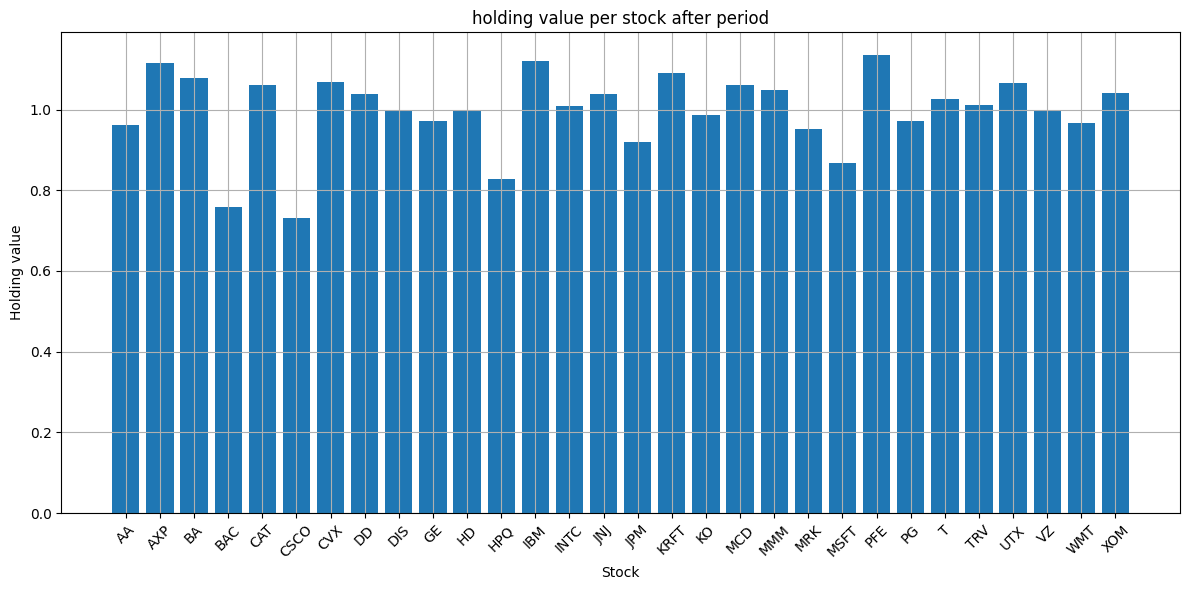

In [ ]:
# Calculating the change in each stock if we were to just buy in the beginning of the timeseries and selling at the end

dow_jones = pd.read_csv("dow_jones_index.data")
columns_to_change = ["open", "high", "low", "close", "next_weeks_open", "next_weeks_close"]
for column in columns_to_change:
    dow_jones[column] = dow_jones[column].replace({"\\$": ""}, regex=True).astype(float)

results = []
dow_jones["date"] = pd.to_datetime(dow_jones["date"])
unique_stocks = dow_jones["stock"].unique()

for stock in unique_stocks:
    stock_data = dow_jones[dow_jones["stock"] == stock]
    stock_data = stock_data.sort_values("date")
    first_open = stock_data.iloc[0]["open"]
    last_close = stock_data.iloc[-1]["close"]
    price_inc_perc = last_close / first_open 

    results.append({
        "stock": stock,
        "first_date_open": first_open,
        "last_date_close": last_close,
        "price_inc_percentage": price_inc_perc
    })

def run_holding_strat(df, total_holdings):
    holdings_per_stock = total_holdings / len(df)
    winloseperstock = []

    for _, stock in df.iterrows():
        winlose_stock = {
            "stock": stock["stock"],
            "holding_value": holdings_per_stock * stock["price_inc_percentage"]
        }
        winloseperstock.append(winlose_stock)

    winlose_df = pd.DataFrame(winloseperstock)
    return winlose_df

initial_holding = 30

results_df = pd.DataFrame(results)
win_lose_df = run_holding_strat(results_df, initial_holding)
print(f'Percentage change after holding on to the stocks wihtout weekly trading: {sum(win_lose_df["holding_value"])/initial_holding}')

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(win_lose_df["stock"], win_lose_df["holding_value"])
plt.xlabel("Stock")
plt.ylabel("Holding value")
plt.title("holding value per stock after period")
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()